# Primer On Creating and Playing Animations in a Jupyter Notebook
---

Table of Contents:
1. [Quick 2D animations via plot updating](#section1)
2. [Creating 2D animations manually using FFmpeg](#section2)
3. [Creating 2D animations using matplotlib.animation](#section3)
4. [Creating 3D animations -- Surfaces](#section4)
5. [Creating 3D animations -- Point on a Curve](#section5)
6. [Appendix: Embedding a YouTube video in a notebook](#section6)

## 1. Quick 2D animations via plot updating <a id='section1'></a>

PROS: quick and simple.

CONS: outputs to notebook only, animation is not saved, must re-run notebook cell everytime you want to play the animation.

In [1]:
# set graphics backend
%matplotlib notebook
# import packages
import numpy as np
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


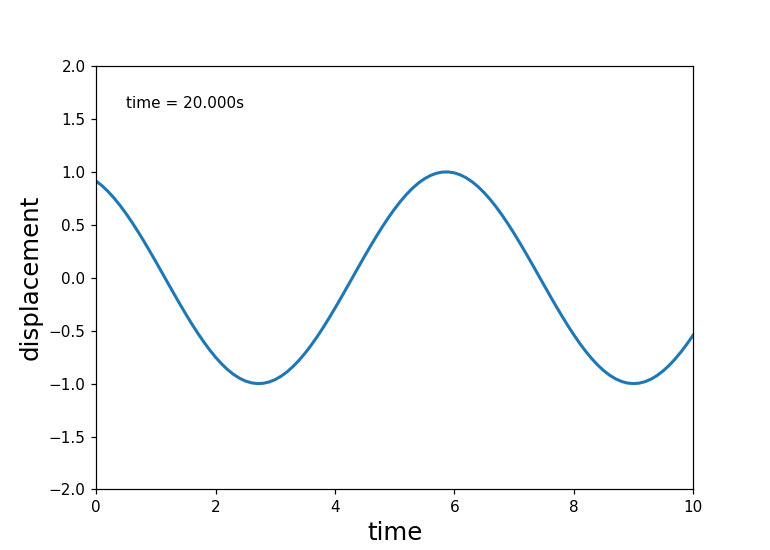

In [2]:
# time grid
tmin = 0
tmax = 20.0
Nt = 100
tgrid = np.linspace(tmin, tmax, Nt+1)

# space grid
xmin = 0
xmax = 10
Nx = 100
xgrid = np.linspace(xmin, xmax, Nx+1)

# function to animate
def wavefxn(t, x):
    return np.sin(t - x)

# initialize figure
fig = plt.figure(figsize=(7, 5), dpi=100)
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
ax.set_xlabel('time', fontsize=16)
ax.set_ylabel('displacement', fontsize=16)
line, = ax.plot([], [], lw=2)
time_template = 'time = %.3fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# update figure
for tstep in tgrid:
    line.set_data(xgrid, wavefxn(tstep, xgrid))
    time_text.set_text(time_template % tstep)
    fig.canvas.draw()

## 2. Creating 2D animations manually using FFmpeg <a id='section2'></a>

PROS: animation is stored in an external file for anytime-playback on different devices.

CONS: more complicated than the first method above, playback from external file only.

In [5]:
# set graphics backend
%matplotlib notebook
# import packages
import numpy as np
from matplotlib import pyplot as plt
import os

In [6]:
# make auxiliary directory
folder = 'animation_files'
if not os.path.exists(folder):
    os.mkdir(folder)

In [7]:
# time grid
tmin = 0
tmax = 20.0
Nt = 100
tgrid = np.linspace(tmin, tmax, Nt+1)

# space grid
xmin = 0
xmax = 20.0
Nx = 100
xgrid = np.linspace(xmin, xmax, Nx+1)

# function to animate
def wavefxn(t, x):
    return np.sin(t - x)

# draw frame
def draw_frame(t, x):
    ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
    ax.set_xlabel('time', fontsize=16)
    ax.set_ylabel('displacement', fontsize=16)
    ax.plot(x, wavefxn(t, x), lw=2, animated=True)
    ax.text(0.05, 0.9, 'time = %5.2fs' % t, transform=ax.transAxes)

# make frames
plt.ioff()
for i in range(len(tgrid)):
    file_name = folder + '/_temp%05d.png' % i
    draw_frame(tgrid[i], xgrid)
    plt.savefig(file_name)
    plt.clf()

# process frames
os.chdir(folder)
os.system('rm wave_method2.mp4')
os.system('ffmpeg -r 25 -i _temp%05d.png -vcodec libx264 wave_method2.mp4')
os.system('rm _temp*.png')
os.chdir('..')

# reset
plt.close()
plt.ion()

### Playback from movie file (only option)

In [8]:
# playback in notebook
from IPython.display import HTML
HTML("""
<video width="800" height="600" controls loop>
  <source src="animation_files/wave_method2.mp4" type="video/mp4">
</video>
""")

## 3. Creating 2D animations using matplotlib.animation <a id='section3'></a>

PROS: supports notebook playback, supports saving to (or playback from) an external file, more powerful and versatile than first method above, uses built-in Python library that has been specially designed for animations.

CONS: more complicated than the previous two methods.

In [10]:
# set graphics backend
%matplotlib notebook
# import packages
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [11]:
# time grid
tmin = 0.0 
tmax = 10.0
Nt = 100
tgrid = np.linspace(tmin, tmax, Nt+1)

# space grid
xmin = 0.0 
xmax = 10.0
Nx = 100
xgrid = np.linspace(xmin, xmax, Nx+1)

# function to animate
def wavefxn(t, x):
    return np.sin(t - x)

# initialize figure
plt.ioff()
fig = plt.figure();
ax = fig.add_subplot(111)
ax.set(xlim=(0, 10), ylim=(-2, 2))
ax.set_xlabel('time', fontsize=16)
ax.set_ylabel('displacement', fontsize=16)
plot, = ax.plot([], [], lw=2)
time_template = 'time = %5.2fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# update figure
def update_figure(t, plot, time_template, time_text):
    plot.set_data(xgrid, wavefxn(t, xgrid))
    time_text.set_text(time_template % t)

# make animation
anim = animation.FuncAnimation(
    fig, update_figure, frames=tgrid, fargs=(plot, time_template, time_text),
    interval=200, repeat_delay=200, repeat=False, blit=True
)

# reset
plt.close()
plt.ion()

### Playback as html5 video, option 1

In [12]:
from matplotlib import animation, rc
rc('animation', html='html5')
anim

### Playback as html5 video, option 2

In [10]:
from IPython.display import HTML
HTML(anim.to_html5_video())

### Playback from file

In [11]:
# write to file
file = 'wave_method3.mp4'
anim.save(folder + '/' + file, fps=30, extra_args=['-vcodec', 'libx264'])

In [12]:
# playback in notebook, from file
from IPython.display import HTML
HTML("""
<video width="800" height="600" controls>
  <source src="animation_files/wave_method3.mp4" type="video/mp4">
</video>
""")

## 4. Creating 3D animations -- Surfaces <a id='section4'></a>

The ideas behind making 3D animations is the same as 2D animations. However, there are some quirks in matplotlib that one needs to be aware of when creating 3D animations. We'll start with animating a surface in 3D.

In [5]:
# set graphics backend
%matplotlib notebook
# import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation

In [6]:
# time grid
tmin = 0.0
tmax = 10.0
Nt = 100
tgrid = np.linspace(tmin, tmax, Nt+1)

# meshgrid
xmin = ymin = -10.0
xmax = ymax = 10.0
Nx = Ny = 100
xgrid = np.linspace(xmin, xmax, Nx+1)
ygrid = np.linspace(ymin, ymax, Ny+1)
xi, yi = np.meshgrid(xgrid, ygrid)

# function to animate
zi = np.zeros((len(xgrid), len(ygrid), len(tgrid)))
f = lambda xx, yy, sig : 1/np.sqrt(sig)*np.exp(-(xx**2 + yy**2)/sig**2)
for i in range(len(tgrid)):
    zi[:, :, i] = f(xi, yi, 1.5+np.sin(i*2*np.pi/len(tgrid)))

# initialize figure
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 1.1)
scene = [ax.plot_surface(xi, yi, zi[:,:,0], color='0.75', rstride=1, cstride=1)]

# update figure
def update_plot(frame_number, zi, plot):
    scene[0].remove()
    scene[0] = ax.plot_surface(xi, yi, zi[:, :, frame_number], cmap="magma")
    return scene

# make animation
fps=30
frames=range(len(tgrid))
anim = animation.FuncAnimation(
    fig, update_plot, frames, fargs=(zi, scene), 
    interval=1000/fps, blit=True, repeat=False)

### Play in notebook

<IPython.core.display.Javascript object>


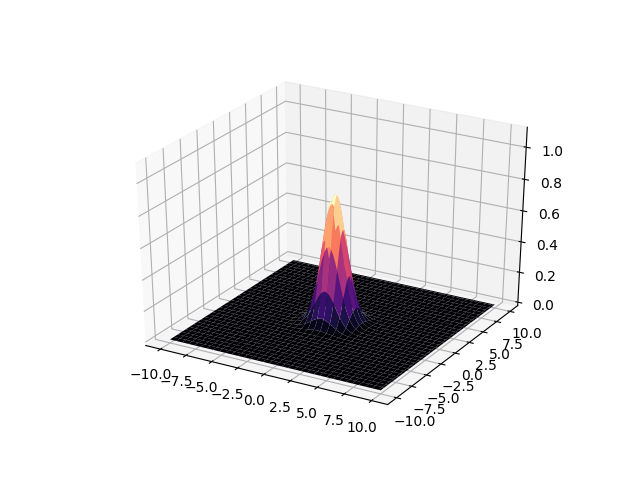

In [7]:
# play in notebook
plt.show()

In [ ]:
# reset
plt.close()
plt.ion()

### Playback as embedded HTML

In [ ]:
# play as embedded html
from IPython.display import HTML
HTML(anim.to_html5_video())

### Playback from file

In [ ]:
# write to file
folder = 'animation_files'
file = 'surface3D'
anim.save(folder + '/' + file + '.mp4', writer='ffmpeg', fps=fps)
anim.save(folder + '/' + file + '.gif', writer='imagemagick', fps=fps)

In [ ]:
# playback from file
from IPython.display import HTML
HTML("""
<video width="800" height="600" controls>
  <source src="animation_files/surface3D.mp4" type="video/mp4">
</video>
""")

## 5. Creating 3D animations -- Point on a Curve <a id='section5'></a>

In [1]:
# set graphics backend
%matplotlib notebook
# import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation

In [2]:
# time grid
tmin = 0.0
tmax = 10.0
Nt = 400
T = abs(tmax - tmin)
tgrid = np.linspace(tmin, tmax, Nt+1)

# data
xdata = np.cos(12*np.pi*tgrid/T)
ydata = np.sin(12*np.pi*tgrid/T)
zdata = np.sin(4*np.pi*tgrid/T)

# initialize figure
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
x1 = xdata[0]
y1 = ydata[0]
z1 = zdata[0]
x2 = -xdata[0]
y2 = -ydata[0]
z2 = -zdata[0]
scene = [ax.scatter([x1, x2], [y1, y2], [z1, z2], color=['r', 'g'], marker='o', s=40, alpha=1.0)]
plot_static = [ax.plot(xdata, ydata, zdata, color='b', lw=1)]

# update figure
def update_plot(frame_number, xdata, ydata, zdata, scene):
    scene[0].remove()
    x1 = xdata[frame_number]
    y1 = ydata[frame_number]
    z1 = zdata[frame_number]                
    x2 = -xdata[frame_number]
    y2 = -ydata[frame_number]
    z2 = -zdata[frame_number]                
    scene[0] = ax.scatter([x1, x2], [y1, y2], [z1, z2], color=['r', 'g'], marker='o', s=40, alpha=1.0)
    return scene

# make animation
fps=30
frames=range(len(tgrid))
anim = animation.FuncAnimation(
    fig, update_plot, frames, fargs=(xdata, ydata, zdata, scene), 
    interval=1000/fps, blit=True, repeat=False)

### Play in notebook

<IPython.core.display.Javascript object>


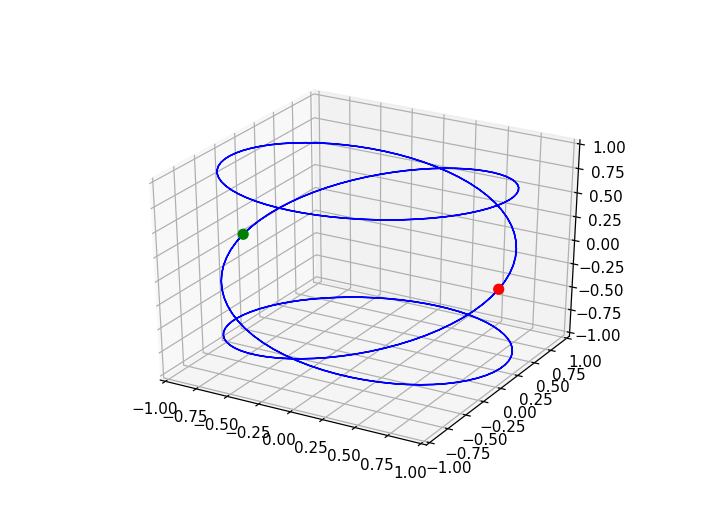

In [3]:
# play in notebook
plt.show()

In [ ]:
# reset
plt.close()
plt.ion()

### Playback as embedded HTML

In [ ]:
# play as embedded html
from IPython.display import HTML
HTML(anim.to_html5_video())

### Playback from file

In [ ]:
# write to file
folder = 'animation_files'
file = 'curve3D'
anim.save(folder + '/' + file + '.mp4', writer='ffmpeg', fps=fps)
anim.save(folder + '/' + file + '.gif', writer='imagemagick', fps=fps)

In [ ]:
# playback from file
from IPython.display import HTML
HTML("""
<video width="800" height="600" controls>
  <source src="animation_files/curve3D.mp4" type="video/mp4">
</video>
""")

## 6. Appendix: Embedding a YouTube video in a notebook <a id='section6'></a>

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/_GhkWuIDzpc" allowfullscreen></iframe>')